# Part 2: the mutli-layer perceptron

# Task 1: Implement the MLP architecture by completing the files mlp numpy.py and modules.py

modules.py

mlp_numpy.py

# Task 2: Implement training and testing script in train mlp numpy.py

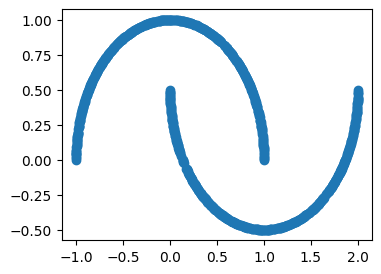

In [1]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
def generate_data():
    x, y = make_moons(n_samples=1000, random_state=42)
    one_hot_encoded = OneHotEncoder(sparse_output=False)
    y_2d = y.reshape(-1, 1)
    y_onehot = one_hot_encoded.fit_transform(y_2d)

    x_train, x_test, y_train_onehot, y_test_onehot = train_test_split(x, y_onehot, test_size=0.2, random_state=42)
    return x_train, x_test, y_train_onehot, y_test_onehot

x_train, x_test, y_train, y_test = generate_data()

plt.figure(figsize=(4,3))
plt.scatter(x_train[:,0], x_train[:,1])
plt.show()

## 2.1 shuffle data and add some noise

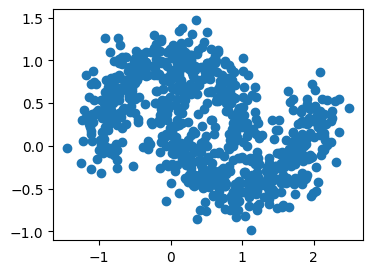

In [2]:
def generate_data():
    x, y = make_moons(n_samples=1000, shuffle=True, noise=0.2, random_state=42)
    one_hot_encoded = OneHotEncoder(sparse_output=False)
    y_2d = y.reshape(-1, 1)
    y_onehot = one_hot_encoded.fit_transform(y_2d)

    x_train, x_test, y_train_onehot, y_test_onehot = train_test_split(x, y_onehot, test_size=0.2, random_state=42)
    return x_train, x_test, y_train_onehot, y_test_onehot

x_train, x_test, y_train, y_test = generate_data()

plt.figure(figsize=(4,3))
plt.scatter(x_train[:,0], x_train[:,1])
plt.show()

### Task 3 Training the data

In [3]:
import train_mlp_numpy
# Default constants
DNN_HIDDEN_UNITS_DEFAULT = '20'
LEARNING_RATE_DEFAULT = 1e-2
MAX_EPOCHS_DEFAULT = 1500  # adjust if you use batch or not
EVAL_FREQ_DEFAULT = 10
DEFAULT_BATCH_SIZE = 1000

training_loss, training_accuracy,testing_loss, testing_accuracy = train_mlp_numpy.train(DNN_HIDDEN_UNITS_DEFAULT, LEARNING_RATE_DEFAULT, MAX_EPOCHS_DEFAULT, EVAL_FREQ_DEFAULT, DEFAULT_BATCH_SIZE)

Step: 0, Train Loss: 2.83, Train Accuracy: 62.50%, Test Loss: 2.75, Test Accuracy: 61.00%
Step: 10, Train Loss: 0.55, Train Accuracy: 84.38%, Test Loss: 0.51, Test Accuracy: 82.00%
Step: 20, Train Loss: 0.56, Train Accuracy: 82.88%, Test Loss: 0.53, Test Accuracy: 80.50%
Step: 30, Train Loss: 0.39, Train Accuracy: 88.12%, Test Loss: 0.35, Test Accuracy: 89.00%
Step: 40, Train Loss: 0.35, Train Accuracy: 88.50%, Test Loss: 0.33, Test Accuracy: 88.00%
Step: 50, Train Loss: 0.35, Train Accuracy: 88.62%, Test Loss: 0.33, Test Accuracy: 88.50%
Step: 60, Train Loss: 0.33, Train Accuracy: 88.62%, Test Loss: 0.32, Test Accuracy: 89.00%
Step: 70, Train Loss: 0.33, Train Accuracy: 88.50%, Test Loss: 0.32, Test Accuracy: 88.50%
Step: 80, Train Loss: 0.32, Train Accuracy: 88.88%, Test Loss: 0.32, Test Accuracy: 88.50%
Step: 90, Train Loss: 0.32, Train Accuracy: 89.00%, Test Loss: 0.31, Test Accuracy: 88.50%
Step: 100, Train Loss: 0.31, Train Accuracy: 89.00%, Test Loss: 0.31, Test Accuracy: 88.00%

### Plot the result

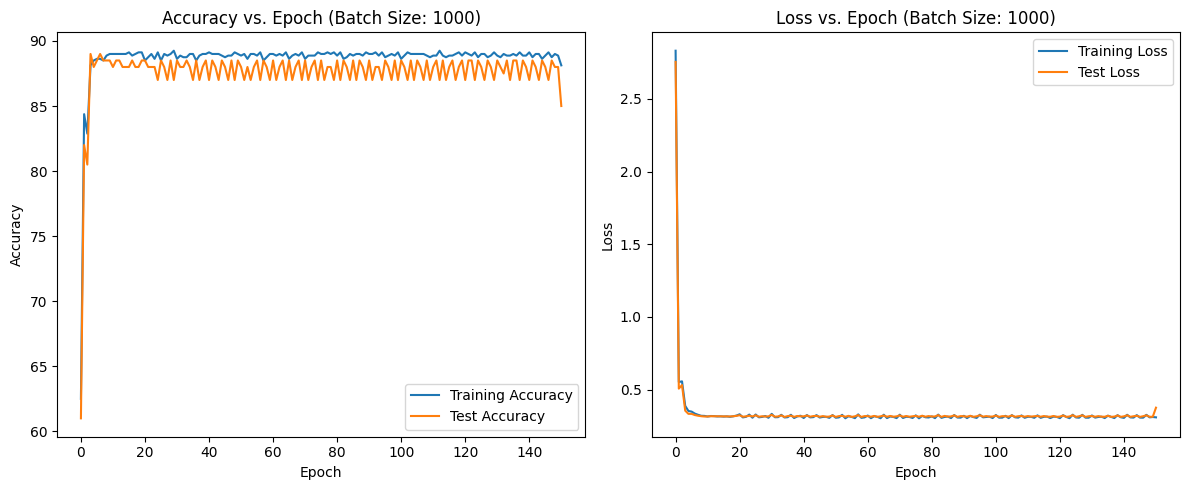

In [4]:
import numpy as np
training_accuracy = np.array(training_accuracy)
testing_accuracy  = np.array(testing_accuracy )
training_loss = np.array(training_loss)
testing_loss = np.array(testing_loss)


# Plot the accuracy vs. epoch
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot accuracy vs. epoch
axs[0].plot(training_accuracy, label='Training Accuracy')
axs[0].plot(testing_accuracy, label='Test Accuracy')
axs[0].set_title('Accuracy vs. Epoch (Batch Size: ' + str(DEFAULT_BATCH_SIZE) + ')')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

# Plot loss vs. epoch
axs[1].plot(training_loss, label='Training Loss')
axs[1].plot(testing_loss, label='Test Loss')
axs[1].set_title('Loss vs. Epoch (Batch Size: ' + str(DEFAULT_BATCH_SIZE) + ')')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()

plt.tight_layout()
plt.show()

# Part 3: stochastic gradient descent

## Task 1
Modify the train method in train mlp numpy.py to accept a parameter that allows the user to specify if the
training has to be performed using batch gradient descent

## Task 2 

In [5]:
# batch size = 1 

batch_size = 1

training_loss, training_accuracy,testing_loss, testing_accuracy = train_mlp_numpy.train(DNN_HIDDEN_UNITS_DEFAULT, LEARNING_RATE_DEFAULT, MAX_EPOCHS_DEFAULT, EVAL_FREQ_DEFAULT, batch_size)

Step: 0, Train Loss: 0.29, Train Accuracy: 87.25%, Test Loss: 0.29, Test Accuracy: 87.50%
Step: 10, Train Loss: 0.18, Train Accuracy: 93.00%, Test Loss: 0.17, Test Accuracy: 92.50%
Step: 20, Train Loss: 0.11, Train Accuracy: 96.50%, Test Loss: 0.09, Test Accuracy: 98.00%
Step: 30, Train Loss: 0.09, Train Accuracy: 96.62%, Test Loss: 0.06, Test Accuracy: 98.00%
Step: 40, Train Loss: 0.08, Train Accuracy: 96.62%, Test Loss: 0.06, Test Accuracy: 97.50%
Step: 50, Train Loss: 0.08, Train Accuracy: 96.75%, Test Loss: 0.05, Test Accuracy: 97.00%
Step: 60, Train Loss: 0.08, Train Accuracy: 96.75%, Test Loss: 0.05, Test Accuracy: 97.50%
Step: 70, Train Loss: 0.07, Train Accuracy: 96.88%, Test Loss: 0.05, Test Accuracy: 97.50%
Step: 80, Train Loss: 0.07, Train Accuracy: 97.00%, Test Loss: 0.05, Test Accuracy: 97.50%
Step: 90, Train Loss: 0.07, Train Accuracy: 97.00%, Test Loss: 0.05, Test Accuracy: 97.50%
Step: 100, Train Loss: 0.07, Train Accuracy: 97.00%, Test Loss: 0.05, Test Accuracy: 97.50%

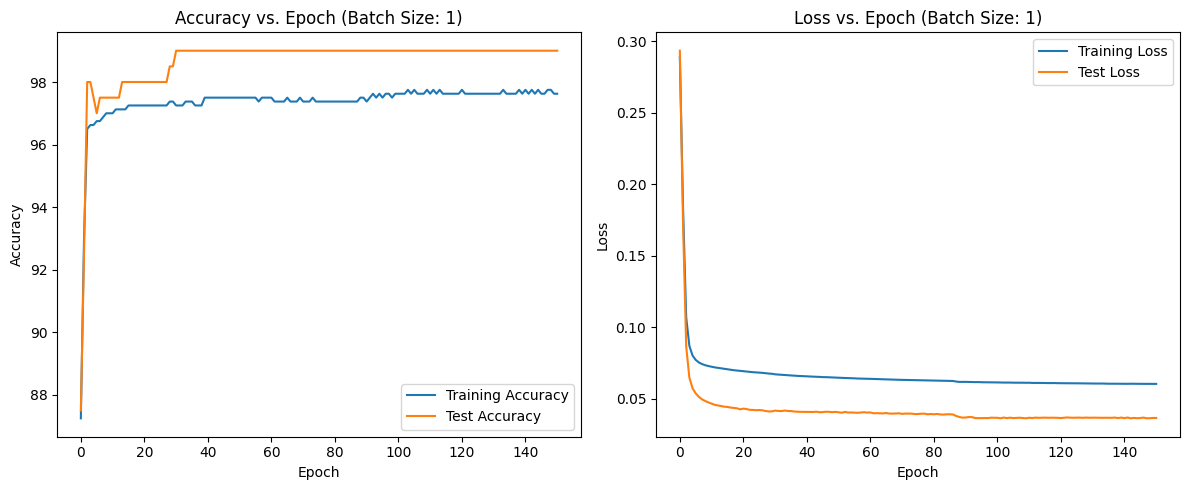

In [6]:
training_accuracy = np.array(training_accuracy)
testing_accuracy  = np.array(testing_accuracy )
training_loss = np.array(training_loss)
testing_loss = np.array(testing_loss)
# Plot the accuracy vs. epoch
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
# Plot accuracy vs. epoch
axs[0].plot(training_accuracy, label='Training Accuracy')
axs[0].plot(testing_accuracy, label='Test Accuracy')
axs[0].set_title('Accuracy vs. Epoch (Batch Size: ' + str(batch_size) + ')')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

# Plot loss vs. epoch
axs[1].plot(training_loss, label='Training Loss')
axs[1].plot(testing_loss, label='Test Loss')
axs[1].set_title('Loss vs. Epoch (Batch Size: ' + str(batch_size) + ')')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()

plt.tight_layout()
plt.show()

In [7]:
batch_size = 10000000

training_loss, training_accuracy,testing_loss, testing_accuracy = train_mlp_numpy.train(DNN_HIDDEN_UNITS_DEFAULT, LEARNING_RATE_DEFAULT, MAX_EPOCHS_DEFAULT, EVAL_FREQ_DEFAULT, batch_size)

Step: 0, Train Loss: 0.44, Train Accuracy: 86.12%, Test Loss: 0.41, Test Accuracy: 85.50%
Step: 10, Train Loss: 1.08, Train Accuracy: 69.50%, Test Loss: 1.25, Test Accuracy: 66.00%
Step: 20, Train Loss: 0.45, Train Accuracy: 84.00%, Test Loss: 0.57, Test Accuracy: 80.00%
Step: 30, Train Loss: 0.38, Train Accuracy: 87.00%, Test Loss: 0.45, Test Accuracy: 84.50%
Step: 40, Train Loss: 0.33, Train Accuracy: 87.38%, Test Loss: 0.39, Test Accuracy: 85.00%
Step: 50, Train Loss: 0.29, Train Accuracy: 87.75%, Test Loss: 0.34, Test Accuracy: 85.00%
Step: 60, Train Loss: 0.27, Train Accuracy: 88.50%, Test Loss: 0.30, Test Accuracy: 85.00%
Step: 70, Train Loss: 0.27, Train Accuracy: 88.38%, Test Loss: 0.30, Test Accuracy: 85.00%
Step: 80, Train Loss: 0.25, Train Accuracy: 88.75%, Test Loss: 0.28, Test Accuracy: 85.50%
Step: 90, Train Loss: 0.25, Train Accuracy: 88.75%, Test Loss: 0.28, Test Accuracy: 85.50%
Step: 100, Train Loss: 0.25, Train Accuracy: 88.75%, Test Loss: 0.27, Test Accuracy: 86.00%

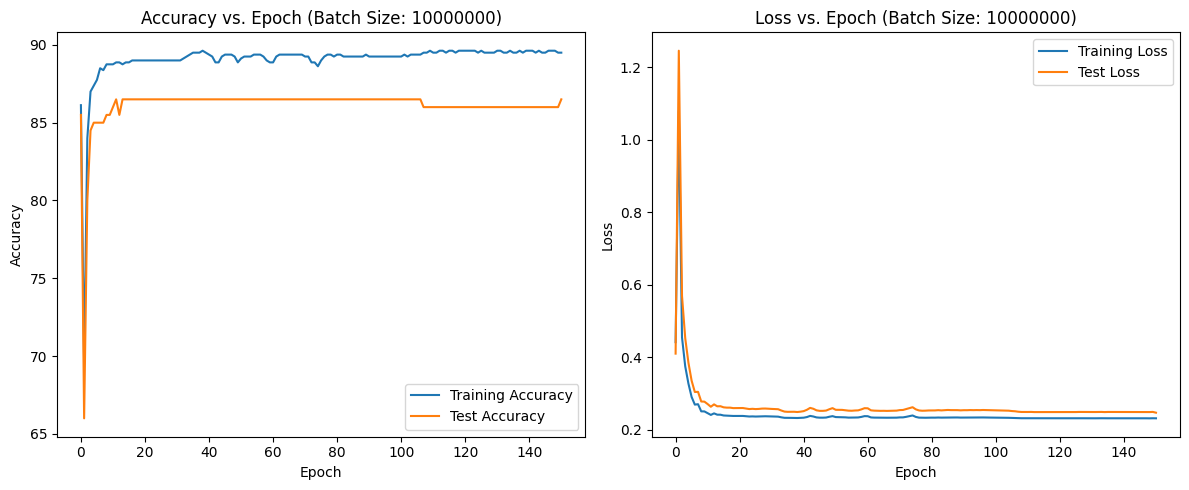

In [8]:
training_accuracy = np.array(training_accuracy)
testing_accuracy  = np.array(testing_accuracy )
training_loss = np.array(training_loss)
testing_loss = np.array(testing_loss)


# Plot the accuracy vs. epoch
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot accuracy vs. epoch
axs[0].plot(training_accuracy, label='Training Accuracy')
axs[0].plot(testing_accuracy, label='Test Accuracy')
axs[0].set_title('Accuracy vs. Epoch (Batch Size: ' + str(batch_size) + ')')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

# Plot loss vs. epoch
axs[1].plot(training_loss, label='Training Loss')
axs[1].plot(testing_loss, label='Test Loss')
axs[1].set_title('Loss vs. Epoch (Batch Size: ' + str(batch_size) + ')')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()

plt.tight_layout()
plt.show()